In [ ]:
class Matrix:

    def __init__(self, m_arr):
        self.shape = (len(m_arr), len(m_arr[0]))
        self.matrix = m_arr

    def __str__(self):
        str_matrix = '[\n'
        for row in self.matrix:
            str_matrix += ' ' + str(row) + '\n'
        return str_matrix + ']'

    def dot(self, other):

        assert self.shape[1] == other.shape[0], f'Can\'t multiply matrices with shape {self.shape} and {other.shape}'

        matrix = [[0 for _ in range(other.shape[1])] for _ in range(self.shape[0])]

        for i in range(self.shape[0]):
            for j in range(other.shape[1]):
                matrix[i][j] = sum(self.matrix[i][k] * other.matrix[k][j] for k in range(other.shape[0]))

        return Matrix(matrix)

    def map(self, func):
        return Matrix([[func(val) for val in row] for row in self.matrix])

    def add(self, other):
        return Matrix([[self.matrix[j][i] + other.matrix[j][i] for i in range(self.shape[1])] for j in range(self.shape[0])])

    def add_vect(self, other):
        bc_vector = Matrix([other.matrix[0] for _ in range(self.shape[0])])
        return self.add(bc_vector)

Чтобы наполнить конкретикой понятие сети прямого распространения, рассмотрим
полный пример сети, решающей очень простую задачу: обучение функции XOR.
Функция XOR (исключающее ИЛИ) применяется к двум двоичным значениям,
$x_1$ и $x_2$. Если ровно одно из них равно 1, то XOR возвращает 1, во всех остальных
случаях – 0. Функция XOR является целевой функцией $y = f^{*}$
(x), которую мы хотим
обучить. Наша модель описывает функцию $y = f(x; θ)$, а алгоритм обучения должен
подобрать параметры θ, так чтобы $f$ была максимально похожа на $f^{*}$.

В этом простом примере нас не интересует статистическое обобщение. Мы хотим,
чтобы сеть правильно работала на четырех точках $𝕏 = \{[0, 0]^⏉, [0, 1]^⏉, [1, 0]^⏉, [1, 1]^⏉\}$,
и будем обучать ее на всех этих точках. Единственная проблема – аппроксимировать
обучать набор. Эту проблему можно рассматривать как задачу регрессии и использовать среднеквадратическую функцию потерь. Мы выбрали такую функцию потерь, чтобы максимально упростить математические выкладки. На практике среднеквадратическая
ошибка (СКО) редко подходит для моделирования двоичных данных.

Вычисленная на всем обучающем наборе среднеквадратическая функция потерь
имеет вид:

$J(\theta) = \frac{1}{4} \displaystyle\sum_{x\in𝕏} (f^{*}(x) - f(x;\theta))^2$

Теперь нужно выбрать форму модели f(x; θ). Допустим, что выбирается линейная
модель, в которой θ состоит из параметров w и b:

$f(x; w, b) = x^⏉w + b$.

Мы можем минимизировать $J(θ)$ относительно $w$ и $b$ в замкнутой форме с помощью нормальных уравнений.
Решив нормальные уравнения, получаем $w = 0$, $b = \frac12$. Линейная модель просто
порождает постоянное выходное значение 0.5. Почему так? По рис. 6.1 видно, что линейная модель не способна представить функцию XOR. Чтобы решить эту проблему,
мы можем взять другое пространство признаков, в котором линейной модели будет
уже достаточно для представления решения.
Конкретно, рассмотрим простую сеть прямого распространения с одним скрытым
слоем, содержащим два скрытых блока. Она показана на рис. 6.2. В этой модели имеется вектор скрытых блоков $h$, вычисляемых функцией $f^{(1)}(x; W, c)$. Значения скрытых
блоков служат входами для второго слоя, который одновременно является выходным
слоем сети. Выходной слой – это просто модель линейной регрессии, но применяется
она к h, а не к x. Теперь сеть содержит две функции, $h = f^{(1)}(x; W, c)$ и $y = f^{(2)}(h; w, b)$,
а полная модель образована их композицией $f(x; W, c, w, b) = f^{(2)}(f^{(1)}(x))$.
Что должна вычислять функция $f^{(1)}$? До сих пор линейные модели служили нам верой и правдой, поэтому велико искушение сделать $f^{(1)}$ линейной. К сожалению, если бы $f^{(1)}$ была линейной, то и вся сеть прямого распространения оказалась бы линейной функцией входа. Забудем ненадолго про свободные члены и предположим, что
$f^{(1)}(x) = W^⏉x$, $f^{(2)}(h) = h^⏉w$. Тогда $f(x) = w^⏉W^⏉x$. Эту функцию можно представить
в виде $f(x) = x^⏉w′$, где $w′ = Ww$.
Очевидно, что для описания признаков нужна нелинейная функция. В большинстве
нейронных сетей используют композицию аффинного преобразования с обученными
параметрами и фиксированной нелинейной функции активации. Воспользуемся этой
стратегией и мы, положив $h = g(W^⏉x + c)$, где $W$ – веса линейного преобразования,
а $c$ – смещения. Ранее в модели линейной регрессии мы использовали веса и скалярный параметр смещения для описания аффинного преобразования входного вектора
в выходной скаляр. Теперь же мы описываем аффинное преобразование вектора x
в вектор h, поэтому смещение должно быть вектором. В качестве функции активации
обычно берут функцию, применяемую к каждому элементу: $h_i = g(x^⏉W_{:,i} + c_i
)$.

В современных нейронных сетях по умолчанию рекомендуют использовать блок линейной ректификации (rectified linear unit – ReLU) (Jarrett et al., 2009; Nair and Hinton,
2010; Glorot et al., 2011a), определяемый функцией активации $g(z) = max\{0, z\}$, которая изображена на рис. 6.3.

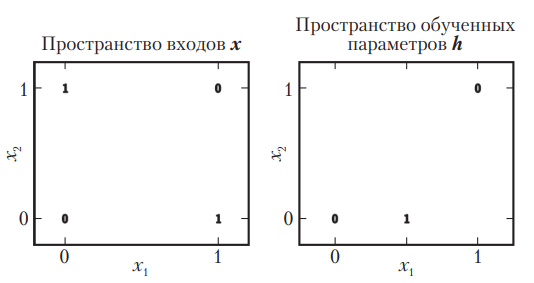

Рис. 6.1 Решение задачи о функции XOR путем обучения представления. Жирными цифрами обозначены значения, которые обученная функция
должна вывести в каждой точке. (Слева) Линейная модель, применяемая
непосредственно к входным данным, неспособна реализовать функцию
XOR. При $x_1 = 0$ выход модели должен возрастать с ростом $x_2$. При $x_1 = 1$ выход модели должен убывать с ростом $x_2$. В линейной модели должен быть
фиксированный коэффициент между $w_2$ и $x_2$. Поэтому линейная модель не
может использовать значение $x_1$ для изменения коэффициента при $x_2$ и,
стало быть, не в состоянии решить задачу. (Справа) В преобразованном
пространстве признаков, выделяемых нейронной сетью, линейная модель
может решить задачу. В нашем случае обе точки, которые должны выводить
1, схлопнуты в одну точку пространства признаков. Иными словами, нелинейное преобразование отображает точки $x = [1, 0]^⏉$ и $x = [0, 1]^⏉$ в одну точку
пространства признаков $h = [1, 0]^⏉$. Теперь линейная модель может описать
функцию, возрастающую относительно $h_1$ и убывающую относительно $h_2$.
В этом примере причиной для обучения в пространстве признаков было
всего лишь желание увеличить емкость модели, так чтобы она могла аппроксимировать обучающий набор. В реальных приложениях обученное таким образом представление способствует лучшей обобщаемости модели.

Теперь можно определить всю сеть целиком:
$f(x; W, c, w, b) = w^⏉ max\{0, W⏉x + c\} + b.$
Теперь мы можем описать решение задачи о функции XOR. Обозначим


In [ ]:
W = Matrix([[1, 1],
            [1, 1]])

c = Matrix([[0, -1]])

w = Matrix([[1],
            [-2]])

и положим $b = 0$

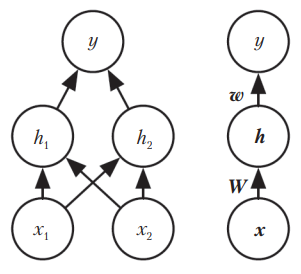

Рис. 6.2 Пример сети обратного распространения, нарисованной двумя способами. Это та сеть, которой мы воспользовались для решения задачи о функции XOR. В сети имеется скрытый слой с двумя блоками. (Слева)
Здесь каждый блок представлен вершиной графа. Этот способ явный и однозначный, но когда сеть побольше, чем в этом примере, рисунок занимает
слишком много места. (Справа) В этом случае вершина графа соответствует целому вектору, представляющему все активации в слое. Такой способ
гораздо компактнее. Иногда ребра графа аннотируются именами параметров, описывающих связь между двумя слоями. Здесь мы указали, что матрица W описывает отображение $x$ в $h$, а вектор $w$ – отображение $h$ в $y$. Как
правило, свободные члены для каждого слоя в таких метках опускаются.

In [ ]:
def relu(x):
    return max(0, x)

In [ ]:
def xor_neural_network(X):

    h = X.dot(W)
    h = h.add_vect(c)
    h = h.map(relu)
    y = h.dot(w)
    return y

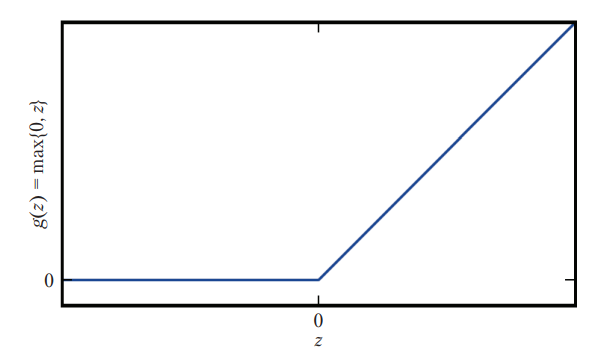

Рис. 6.3 Ректифицированная линейная функция активации. Эта функция по умолчанию рекомендуется для большинства нейронных сетей прямого распространения. Применение ее к выходу линейного преобразования дает нелинейное преобразование. Функция, впрочем, очень близка
к линейной – она является кусочно-линейной с двумя линейными участками. Поскольку блоки линейной ректификации почти линейны, сохраняются
многие свойства, благодаря которым линейные модели легко поддаются
оптимизации градиентными методами. Сохраняются также свойства, обеспечивающие хорошую обобщаемость линейных моделей. Общий принцип
информатики – строить сложные системы из минимальных компонентов.
От памяти машины Тьюринга требуется только способность хранить нуль
и единицу, а универсальный аппроксиматор можно построить из ректифицированных линейных функций

Посмотрим по шагам, как модель обрабатывает входные данные. Обозначим X
матрицу плана, содержащую все четыре точки в пространстве двоичных входов, по
одному примеру в строке:

In [ ]:
X = Matrix([[0, 0],
            [0, 1],
            [1, 0],
            [1, 1]])

Первый шаг нейронной сети – умножение матрицы входов на матрицу весов первого слоя:

In [ ]:
h = X.dot(W)
print(h)

[
 [0, 0]
 [1, 1]
 [1, 1]
 [2, 2]
]


Затем она прибавляет вектор смещений c, получая в результате

In [ ]:
h = h.add_vect(c)
print(h)

[
 [0, -1]
 [1, 0]
 [1, 0]
 [2, 1]
]


В этом пространстве все примеры расположены на прямой с угловым коэффициентом 1. При движении вдоль этой прямой выход вначале должен быть равен 0, затем
поднимается до 1, потом снова падает до 0. Линейная модель такую функцию реализовать не может. Чтобы завершить вычисление $h$ для каждого примера, применим
преобразование линейной ректификации:

In [ ]:
h = h.map(relu)
print(h)

[
 [0, 0]
 [1, 0]
 [1, 0]
 [2, 1]
]


Это преобразование изменило соотношение между примерами. Они больше не лежат на одной прямой. Как видно по рис. 6.1, теперь они расположены в пространстве,
где линейная модель может решить задачу.
В завершение умножаем на вектор весов $w$:

In [ ]:
out = h.dot(w)
print(out)

[
 [0]
 [1]
 [1]
 [0]
]


Нейронная сеть получила правильный ответ для каждого входного примера.
В этом примере мы просто задали решение, а затем показали, что его можно получить с нулевой ошибкой. В реальной ситуации количество параметров модели и обучающих примеров может исчисляться миллиардами, поэтому заранее угадать
решение невозможно. Вместо этого применяется алгоритм градиентной оптимизации, который способен найти параметры с очень небольшой ошибкой. Описанное решение задачи о XOR соответствует глобальному минимуму функции потерь, поэтому
метод градиентного спуска мог бы сойтись к нему. Существуют эквивалентные решения этой задачи, которые также могли бы быть найдены градиентным спуском. К какой точке сойдется градиентный спуск, зависит от начальных значений параметров.
На практике градиентный спуск обычно находит не такие «чистые», целочисленные,
с первого взгляда понятные решения, как описанное в этом разделе.

In [ ]:
print(xor_neural_network(X))

[
 [0]
 [1]
 [1]
 [0]
]


In [ ]:
from functools import partial

# Создадим функцию, аналогичную f1 и f2 (линейный слой НС)
def linear(x, W, b=None):
    y = x.dot(W)
    if b is not None: y = y.add_vect(b)
    return y

# Создадим линейные слои f1 и f2
linear1 = partial(linear, W=W, b=c)
linear2 = partial(linear, W=w)

In [ ]:
def xor_neural_network2(X):

    h = linear1(X).map(relu)
    y = linear2(h)
    return y

In [ ]:
print(xor_neural_network2(X))

[
 [0]
 [1]
 [1]
 [0]
]
